In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

In [2]:
data = load_breast_cancer()
X = data['data']
y = data['target']
feature_names = data['feature_names']
X.shape, y.shape

((569, 30), (569,))

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
pca = PCA()
pca_fit = pca.fit(X)

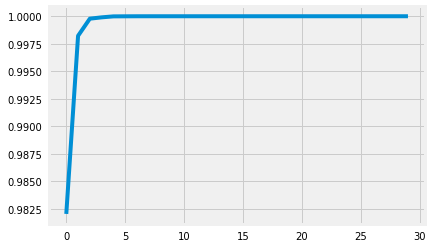

In [5]:
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))

In [6]:
np.cumsum(pca_fit.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [7]:
# Use default DecisionTreeClassifier
adaboost_model = make_pipeline(
    StandardScaler(), AdaBoostClassifier(n_estimators=500, learning_rate=0.9))
print(f'Accuracy : {cross_val_score(adaboost_model, X, y).mean():.2%}')

Accuracy : 97.54%


In [11]:
# Use default DecisionTreeClassifier
adaboost_model = make_pipeline(StandardScaler(),
                               AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100),
                                                  n_estimators=300, learning_rate=0.9))
print(f'Accuracy : {cross_val_score(adaboost_model, X, y).mean():.2%}')

Accuracy : 95.61%


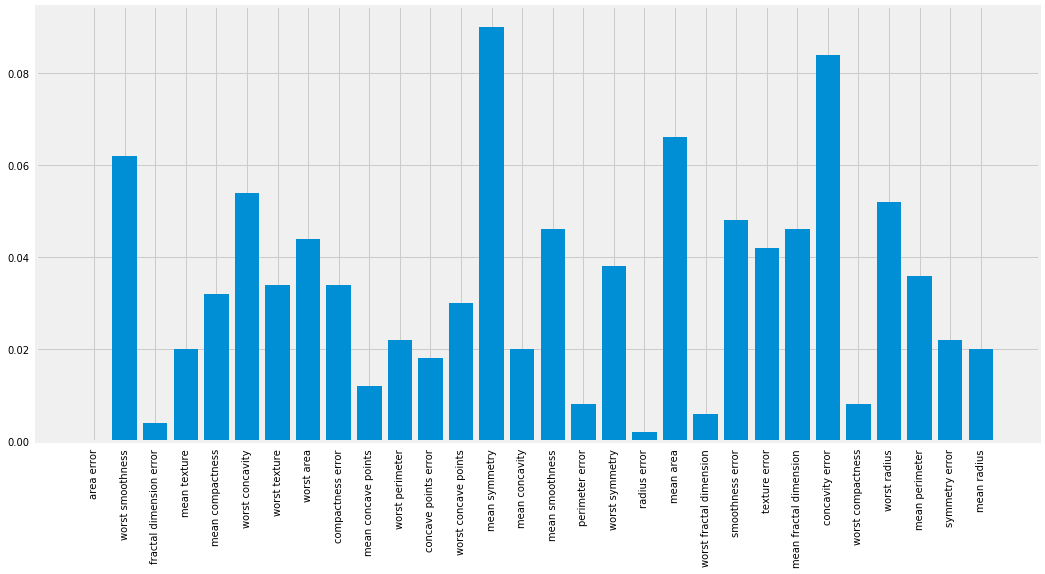

In [12]:
adaboost_model = AdaBoostClassifier(n_estimators=500,
                                    learning_rate=0.9)
adaboost_model.fit(StandardScaler().fit_transform(X), y)
feature_imp = adaboost_model.feature_importances_
indices = np.argsort(feature_imp)[::-1]
names = [data['feature_names'][i] for i in indices]
plt.figure(figsize=(16, 8))
plt.bar(range(len(feature_imp)), feature_imp)
plt.xticks(range(len(feature_imp)), names, rotation=90);

# Using RandomForest feature importances to select features

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

# Standarize the data
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

# Fit RF
rf_model = RandomForestClassifier(n_estimators=300, criterion='gini')
rf_model.fit(X_train, y_train)
print(f'Accuracy : {accuracy_score(y_test, rf_model.predict(X_test)):.2%}')

Accuracy : 95.61%


In [13]:
rf_model.feature_importances_[np.argsort(rf_model.feature_importances_)[::-1]]

array([0.13327244, 0.12583823, 0.11960244, 0.10710024, 0.0990156 ,
       0.05414273, 0.05157044, 0.04411282, 0.03876238, 0.03566975,
       0.02428173, 0.01662839, 0.0161694 , 0.0158663 , 0.01545436,
       0.01334682, 0.01095135, 0.01017092, 0.00984451, 0.00887002,
       0.00752314, 0.00630151, 0.00600783, 0.00556875, 0.00479329,
       0.00451014, 0.00448986, 0.00367265, 0.0036339 , 0.00282802])

In [14]:
# Select features that have more than 0.04
sfm = SelectFromModel(rf_model, threshold=0.04)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.04)

In [15]:
data['feature_names'][sfm.get_support()]

array(['mean radius', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype='<U23')

In [16]:
# Select most important features and refit RF model
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)

In [19]:
X_train.shape, X_test.shape

((455, 9), (114, 9))

In [17]:
# Fit RF
rf_model = RandomForestClassifier(n_estimators=300, criterion='gini')
rf_model.fit(X_train, y_train)
print(f'Accuracy : {accuracy_score(y_test, rf_model.predict(X_test)):.2%}')

Accuracy : 95.61%
